# **UBER PICKUPS IN NEW YORK CITY - DATA ANALYSIS**

**importing necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uberdata=pd.read_csv("/content/drive/MyDrive/dataanalysis/uberDatasets/uber-raw-data-janjune-15_sample.csv")

In [ ]:
uberdata.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [ ]:
type(uberdata)

pandas.core.frame.DataFrame

In [ ]:
uberdata.shape

(100000, 4)

**Data preprocessing**

In [ ]:
uberdata.duplicated().sum()

54

In [ ]:
uberdata.drop_duplicates(inplace=True)

In [ ]:
uberdata.duplicated().sum()

0

In [ ]:
uberdata.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
uberdata["Pickup_date"]=pd.to_datetime(uberdata["Pickup_date"])

In [ ]:
uberdata.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

**which month have maximum pickups?**



In [ ]:
uberdata["Pickup_date"].dt.month

0        5
1        1
2        3
3        4
4        3
        ..
99995    4
99996    3
99997    3
99998    5
99999    6
Name: Pickup_date, Length: 99946, dtype: int32

In [ ]:
uberdata["month"]=uberdata["Pickup_date"].dt.month_name()

In [ ]:
uberdata["month"][0]

'May'

<Axes: xlabel='month'>

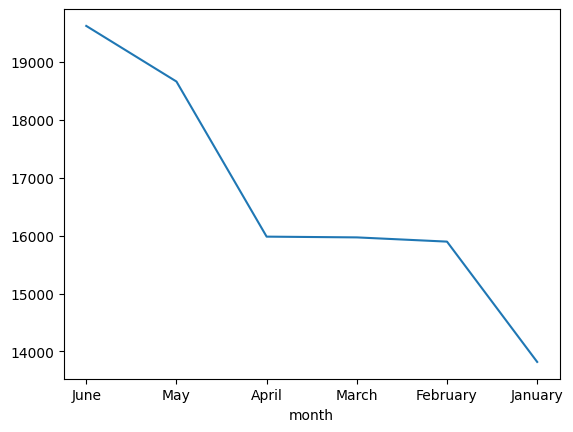

In [ ]:
uberdata["month"].value_counts().plot()

In [ ]:
uberdata["Pickup_date"].dt.day_name()

0         Saturday
1          Tuesday
2         Thursday
3           Friday
4           Monday
           ...    
99995       Monday
99996       Friday
99997     Thursday
99998     Saturday
99999    Wednesday
Name: Pickup_date, Length: 99946, dtype: object

In [ ]:
uberdata["weekday"]=uberdata["Pickup_date"].dt.day_name()
uberdata["hour"]=uberdata["Pickup_date"].dt.hour
uberdata["min"]=uberdata["Pickup_date"].dt.minute

In [ ]:
uberdata.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,hour,min
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,7,3


In [ ]:
pivot=pd.crosstab(index=uberdata.month,columns=uberdata.weekday)

In [ ]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

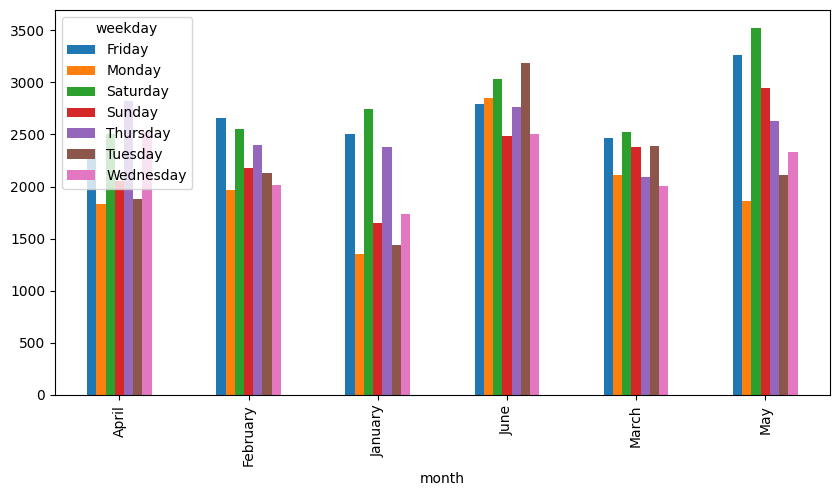

In [ ]:
pivot.plot(kind="bar",figsize=(10,5))

**Analayzing hourly rush in New York**

In [ ]:
summary=uberdata.groupby(['weekday','hour'],as_index=False).size()

In [ ]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

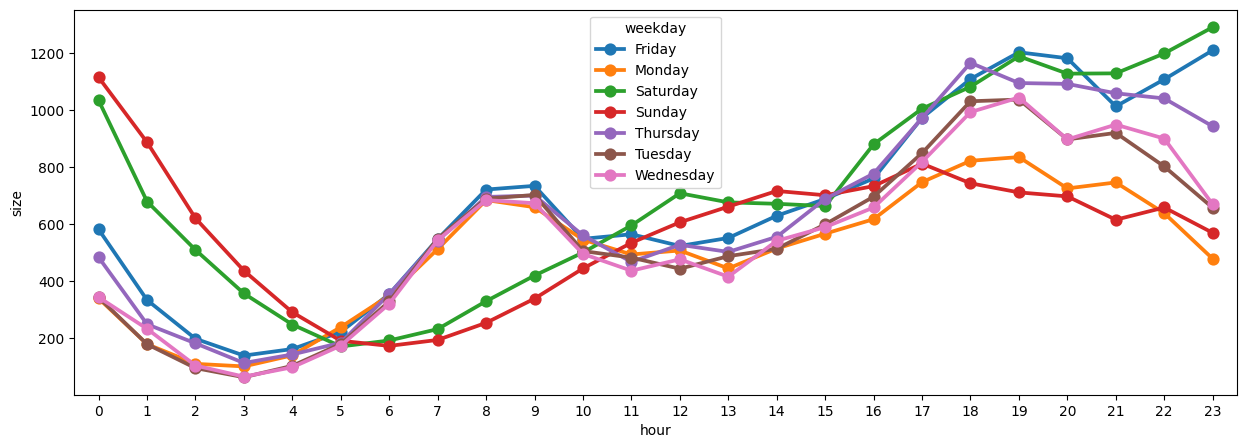

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x='hour',y='size',hue='weekday',data=summary)


**Which Base Number has more active vehicles?**

In [ ]:
uber_foil=pd.read_csv("/content/drive/MyDrive/dataanalysis/uberDatasets/Uber-Jan-Feb-FOIL.csv")

In [ ]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


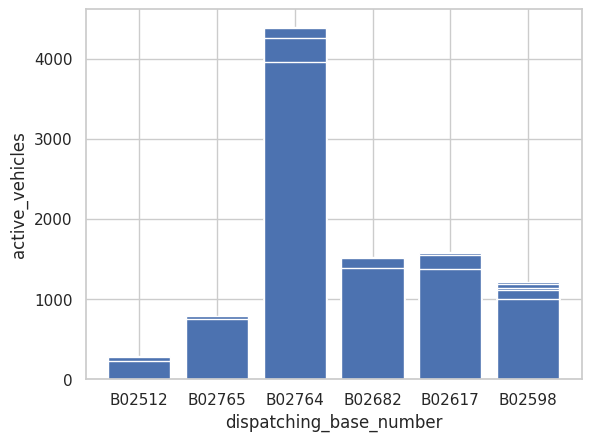

In [ ]:
x=uber_foil["dispatching_base_number"]
y=uber_foil["active_vehicles"]
plt.xlabel("dispatching_base_number")
plt.ylabel("active_vehicles")
plt.bar(x,y)
plt.show()

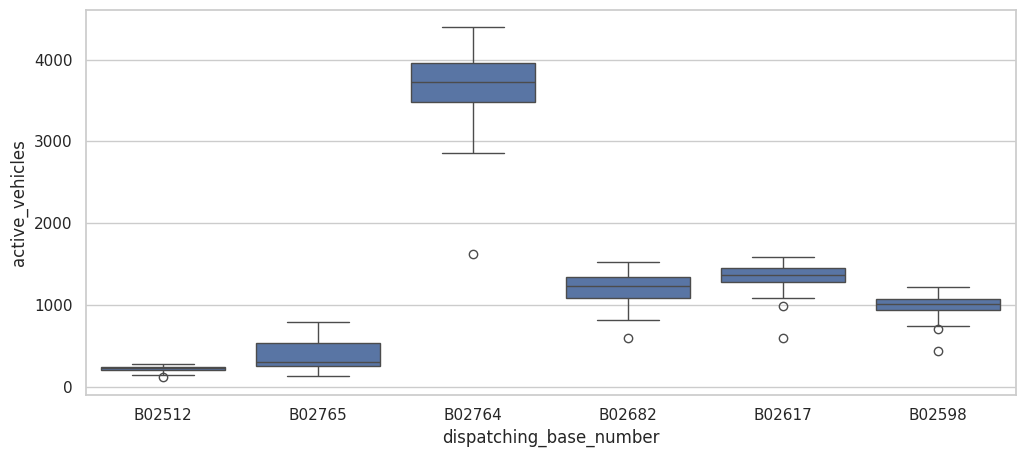

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x=uber_foil["dispatching_base_number"],y=uber_foil["active_vehicles"])
plt.show()

In [ ]:
uber_foil.dtypes

dispatching_base_number    object
date                       object
active_vehicles             int64
trips                       int64
dtype: object

In [ ]:
uber_foil["date"]=pd.to_datetime(uber_foil["date"])

In [ ]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


In [ ]:
uber_foil["month"]=uber_foil["date"].dt.month_name()
uber_foil["weekday"]=uber_foil["date"].dt.day_name()
uber_foil["year"]=uber_foil["date"].dt.year
uber_foil["date1"]=uber_foil["date"].dt.day

In [ ]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips,month,weekday,year,date1
0,B02512,2015-01-01,190,1132,January,Thursday,2015,1
1,B02765,2015-01-01,225,1765,January,Thursday,2015,1
2,B02764,2015-01-01,3427,29421,January,Thursday,2015,1
3,B02682,2015-01-01,945,7679,January,Thursday,2015,1
4,B02617,2015-01-01,1228,9537,January,Thursday,2015,1


In [ ]:
uber_foil['weekday'].value_counts()


weekday
Thursday     54
Friday       54
Saturday     54
Sunday       48
Monday       48
Tuesday      48
Wednesday    48
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

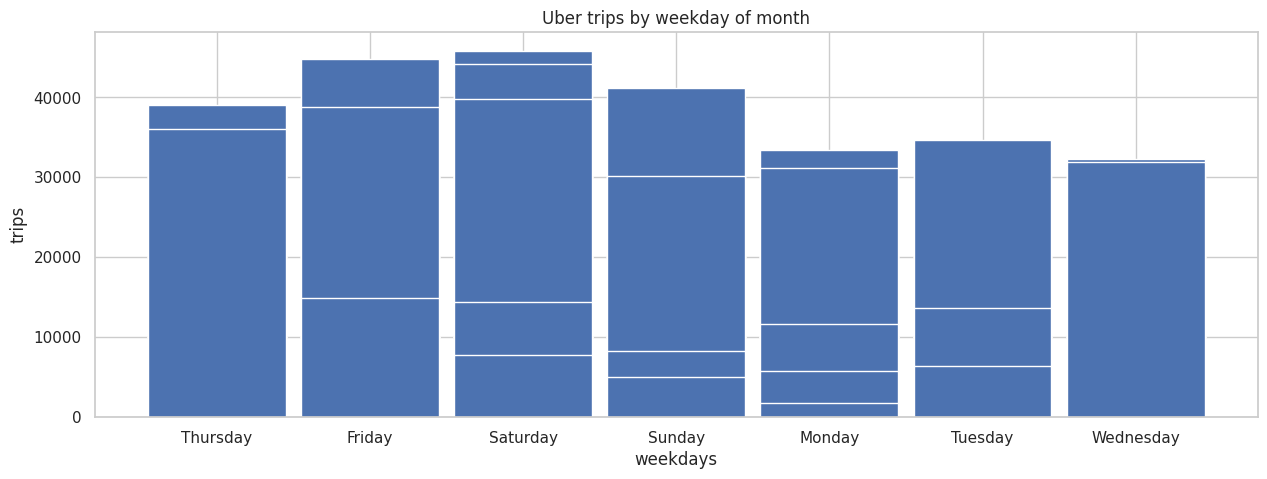

<Figure size 1500x500 with 0 Axes>

In [ ]:
x=uber_foil["weekday"]
y=uber_foil["trips"]
plt.figure(figsize=(15,5))
plt.xlabel("weekdays")
plt.ylabel("trips")
plt.title("Uber trips by weekday of month")
plt.bar(x,y,width=0.9)
plt.figure(figsize=(15,5))


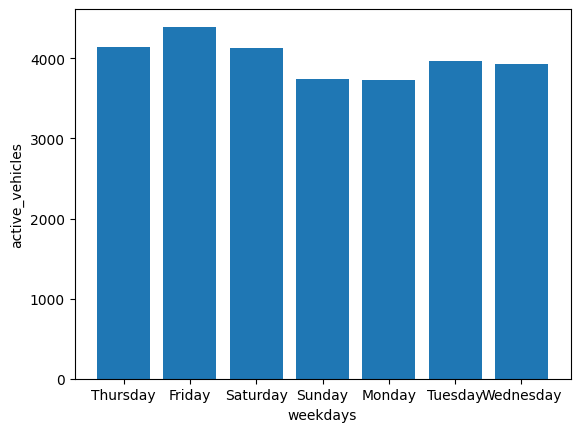

In [ ]:
x=uber_foil["weekday"]
y=uber_foil["active_vehicles"]
plt.xlabel("weekdays")
plt.ylabel("active_vehicles")
plt.bar(x,y)
plt.show()

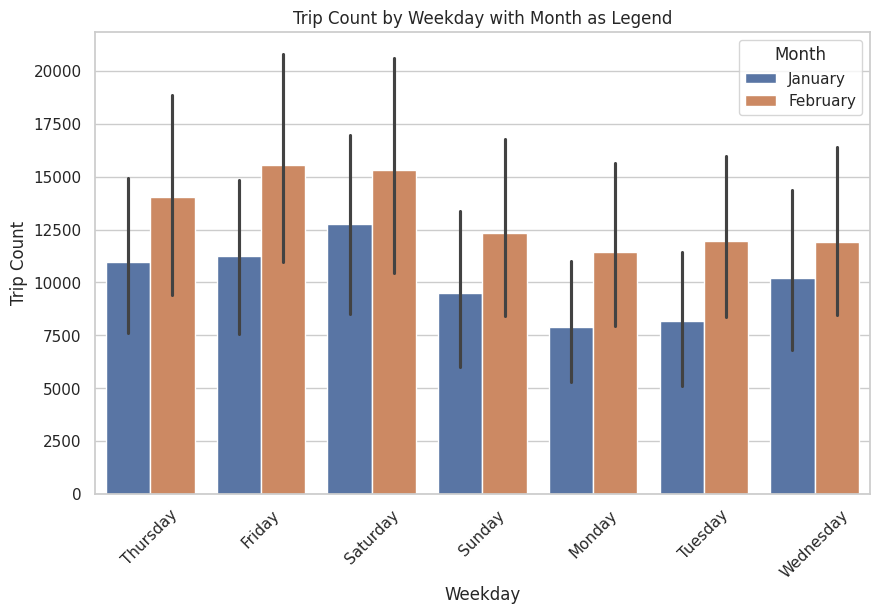

In [ ]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=uber_foil, x=uber_foil['weekday'], y=uber_foil['trips'], hue=uber_foil['month'])

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Trip Count')
plt.title('Trip Count by Weekday with Month as Legend')

# Rotate x labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Month')
plt.show()


In [ ]:
pivot1=pd.crosstab(index=uber_foil.date,columns=uber_foil.month,values=uber_foil.trips,aggfunc=sum)
pivot1.head()

month,February,January
date,,
2015-01-01,NaN,56437.0
2015-01-02,NaN,39189.0
2015-01-03,NaN,58449.0
2015-01-04,NaN,40798.0
2015-01-05,NaN,42752.0


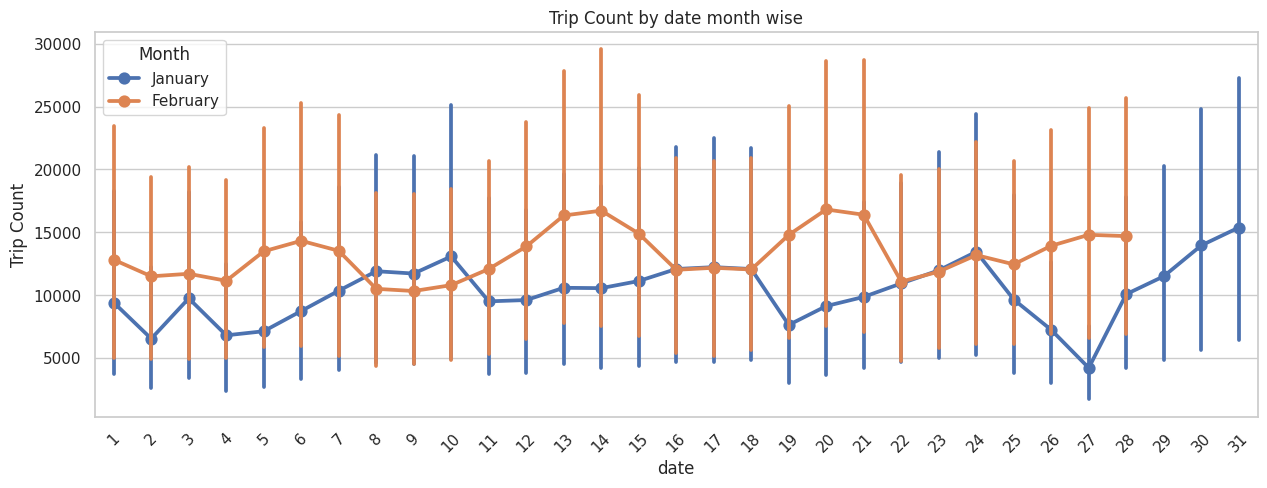

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x=uber_foil.date1,y=uber_foil.trips,hue=uber_foil.month,data=pivot1)
plt.xlabel('date')
plt.ylabel('Trip Count')
plt.title('Trip Count by date month wise')

# Rotate x labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Month')
plt.show()


**COLLECTING ENTIRE DATA**

In [ ]:
import os

In [ ]:
files=os.listdir(r"/content/drive/MyDrive/dataanalysis/uberDatasets")

In [ ]:
files=sorted(files)

In [ ]:
files=files[-9:]
files

['other-Skyline_B00111.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
files.remove("other-Skyline_B00111.csv")

In [ ]:
files.remove("uber-raw-data-janjune-15_sample.csv")

In [ ]:
files.remove("uber-raw-data-janjune-15.csv")

In [ ]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
data=pd.DataFrame()
path=r"/content/drive/MyDrive/dataanalysis/uberDatasets"
for file in files:
  cur_data=pd.read_csv(path+'/'+file)
  data=pd.concat([cur_data,data])

In [ ]:
data.shape

(4534327, 4)

In [ ]:
data.duplicated().sum()

82581

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


**pair wise analysis to figure out rush**

In [ ]:
data["Date/Time"]=pd.to_datetime(data["Date/Time"])

In [ ]:
data["day"]=data["Date/Time"].dt.day
data["hour"]=data["Date/Time"].dt.hour
data["month"]=data["Date/Time"].dt.month_name()
data["weekday"]=data["Date/Time"].dt.day_name()
data["min"]=data["Date/Time"].dt.minute

In [ ]:
data.head()

,Date/Time,Lat,Lon,Base,day,hour,month,weekday,min
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,September,Monday,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,September,Monday,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,September,Monday,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,September,Monday,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,September,Monday,11


In [ ]:
pivot1=pd.crosstab(index=data.hour,columns=data.day)

In [ ]:
pivot1.head(3)

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
hour,,,,,,,,,,,,,,,,,,,,,
0,3178,2435,3354,2897,2733,4537,3645,2830,2657,3296,...,2787,2546,3200,2405,3810,5196,4123,2678,2401,2174
1,1944,1569,2142,1688,1541,2864,2296,1646,1724,2126,...,1637,1580,2055,1499,3065,3635,2646,1827,1510,1394
2,1256,1087,1407,1199,1030,1864,1507,1123,1222,1464,...,1175,1136,1438,1072,2046,2352,1843,1409,1112,1087


In [ ]:
pivot1.style.background_gradient()

day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3178,2435,3354,2897,2733,4537,3645,2830,2657,3296,3036,3227,5408,3748,2497,2547,3155,3390,3217,4475,4294,2787,2546,3200,2405,3810,5196,4123,2678,2401,2174
1,1944,1569,2142,1688,1541,2864,2296,1646,1724,2126,1665,2147,3509,2349,1515,1585,2048,2135,2188,3190,3194,1637,1580,2055,1499,3065,3635,2646,1827,1510,1394
2,1256,1087,1407,1199,1030,1864,1507,1123,1222,1464,1095,1393,2262,1605,1087,1119,1500,1332,1604,2100,1972,1175,1136,1438,1072,2046,2352,1843,1409,1112,1087
3,1308,1414,1467,1424,1253,1555,1597,1483,1480,1434,1424,1362,1832,1656,1381,1395,1488,1626,1675,1858,1727,1468,1429,1493,1439,1806,2055,1802,1678,1403,919
4,1429,1876,1550,1696,1617,1551,1763,1889,1871,1591,1842,1757,1705,1756,1862,1818,1897,1892,1810,1618,1926,1934,1957,1798,1943,1730,1723,1883,1948,1841,773
5,2126,2812,2387,2581,2900,2162,2422,3224,3168,2594,2520,2710,2327,2629,2980,2966,2741,2959,2639,2143,2615,3151,3132,2754,2973,2337,2336,2793,3056,3216,997
6,3664,4920,4241,4592,4814,3642,4102,5431,5802,4664,4954,4576,4196,4257,5050,5558,4562,4688,4733,3584,4185,5204,5204,4484,5356,3776,3539,4290,5213,5757,1561
7,5380,6544,5663,6029,6261,4766,5575,7361,7592,6046,6876,6250,5685,5781,6837,7517,6315,6618,6159,4900,5727,6872,6890,6013,7627,5172,4937,5715,6852,7596,2169
8,5292,6310,5386,5704,6469,4942,5376,7357,7519,6158,6871,6231,6060,5520,6729,7495,5882,6451,6014,5083,5529,6850,6436,5913,7078,5071,5053,5671,6695,7611,2410


**Automation**

In [ ]:
def create_pivottable(df,col1,col2):
  pivottable=pd.crosstab(index=col1,columns=col2)
  return pivottable.style.background_gradient()


In [ ]:
create_pivottable(data,data["hour"],data["min"])

min,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2173,2112,2106,1984,2055,2075,2097,2015,1906,1974,1968,1918,1997,2006,1923,1960,1845,1848,1815,1752,1764,1813,1760,1764,1750,1631,1716,1691,1686,1721,1762,1637,1610,1678,1573,1629,1510,1537,1581,1527,1515,1525,1544,1474,1559,1446,1449,1451,1440,1468,1483,1493,1417,1461,1402,1350,1413,1361,1347,1409
1,1357,1405,1373,1380,1338,1347,1313,1350,1262,1232,1294,1259,1264,1203,1213,1232,1216,1246,1223,1202,1197,1174,1170,1167,1138,1126,1096,1116,1126,1105,1038,1118,1021,1066,1010,1021,1076,953,961,1009,957,973,941,940,932,1002,940,982,957,883,1012,906,942,909,881,858,861,858,893,889
2,885,909,905,868,861,884,817,808,774,834,887,812,766,855,741,775,792,734,751,764,695,746,761,735,755,712,699,710,784,697,725,723,706,705,708,707,664,692,676,662,690,704,716,690,695,705,686,724,689,696,718,699,731,687,721,738,732,725,739,729
3,802,826,825,767,779,783,797,759,759,760,799,797,696,757,757,758,771,765,770,783,737,803,772,780,771,790,826,785,811,798,794,810,786,771,782,818,758,826,780,788,815,754,780,769,792,783,784,801,800,775,851,771,851,846,845,803,809,825,790,791
4,844,842,820,837,815,843,883,840,826,832,898,827,919,829,862,889,894,725,812,852,893,907,887,875,892,926,907,901,888,911,937,864,863,967,921,938,890,889,905,954,932,924,900,945,986,942,937,909,954,897,875,946,977,1008,994,1001,1058,1020,1016,1021
5,1075,1069,1025,1082,1111,1148,1134,1129,1047,1093,1109,1157,1146,1107,1167,1192,1211,1219,1253,1221,1224,1264,1311,1322,1403,1416,1391,1440,1423,1461,1445,1433,1391,1461,1471,1473,1512,1502,1443,1499,1564,1586,1535,1530,1485,1546,1483,1533,1460,1502,1525,1582,1568,1527,1600,1628,1643,1690,1672,1711
6,1686,1746,1806,1783,1746,1789,1735,1882,1870,1959,1926,1987,2019,2075,2080,2057,2090,2091,2192,2151,2208,2289,2264,2289,2396,2392,2428,2424,2375,2524,2451,2472,2363,2428,2603,2497,2495,2495,2594,2591,2662,2593,2675,2666,2637,2628,2636,2671,2646,2569,2616,2537,2700,2687,2703,2645,2784,2720,2796,2780
7,2865,2899,2910,2831,2980,3081,2961,2968,3076,3068,3213,3085,3152,3113,3243,3201,3128,3055,3075,3148,3285,3081,3116,3268,3288,3406,3319,3337,3400,3324,3386,3169,3293,3183,3236,3341,3256,3314,3451,3355,3448,3206,3107,3082,3154,3271,3115,3113,3043,3041,3211,3018,3106,3103,3001,3142,3119,3191,3191,3203
8,3268,3191,3102,3180,3245,3213,3305,3467,3344,3352,3503,3452,3327,3399,3315,3361,3242,3268,3287,3075,3225,3162,3233,3159,3151,3421,3266,3254,3272,3253,3243,3225,3149,3165,3200,3112,3156,3118,3179,3082,3195,3088,3041,3013,3074,3019,2957,2856,2845,2784,2814,2791,2816,2694,2733,2759,2681,2640,2721,2724


In [ ]:
create_pivottable(data,data["month"],data["weekday"])

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,88985,60075,76152,50524,83954,89957,107120
August,145719,90011,129668,108168,121655,105160,113012
July,100987,91672,88626,74976,145791,134968,144949
June,103352,93261,80084,78369,113439,86706,97947
May,131880,62915,101583,55244,126919,75537,88282
September,156609,134199,158081,113877,149614,159425,132294
